In [1]:
using System;
using System.Threading;
using System.Diagnostics;

public class DefiniteIntegral
{
    public static (double res, long time) Solve(double a, double b, Func<double, double> function, double step, int threadsnumber)
    {
        double res = 0.0;
        Barrier barrier = new Barrier(threadsnumber + 1);
        double shag = (b - a) / threadsnumber;
        
        Stopwatch stopwatch = new Stopwatch();
        stopwatch.Start();
        for (int i = 0; i < threadsnumber; i++)
        {
            int thread_i = i;
            Thread thread = new Thread(() =>
            {
                double aL = a + thread_i * shag;
                double bL = a + (thread_i + 1) * shag;
                double resL = 0.0;
                for (double j = aL; j < bL; j += step)
                {
                    double jstep = j + step;
                    if (jstep > bL)
                    {
                        jstep = bL;
                    }
                    resL += (function(j) + function(jstep)) * (jstep - j) / 2;
                }
               
                    res += resL;
                
                barrier.SignalAndWait();
            });
            thread.Start();
        }
        barrier.SignalAndWait();
        stopwatch.Stop();
        long time = stopwatch.ElapsedTicks;
        return  (res, time);
    }
}

Installed Packages ScottPlot, 5.0.35 xunit, 2.8.1

Loading extensions from `C:\Users\litau\.nuget\packages\skiasharp\2.88.8\interactive-extensions\dotnet\SkiaSharp.DotNet.Interactive.dll`

Кол-во потоков: 1, Время выполения: 468348 
Кол-во потоков: 2, Время выполения: 252904 
Кол-во потоков: 3, Время выполения: 168286 
Кол-во потоков: 4, Время выполения: 124928 
Кол-во потоков: 5, Время выполения: 163208 
Кол-во потоков: 6, Время выполения: 134075 
Кол-во потоков: 7, Время выполения: 103437 
Кол-во потоков: 8, Время выполения: 106010 
Кол-во потоков: 9, Время выполения: 146630 
Кол-во потоков: 10, Время выполения: 92437 
Кол-во потоков: 11, Время выполения: 98658 
Кол-во потоков: 12, Время выполения: 112404 
Кол-во потоков: 13, Время выполения: 138837 
Кол-во потоков: 14, Время выполения: 155067 
Кол-во потоков: 15, Время выполения: 109325 
Кол-во потоков: 16, Время выполения: 113005 
Кол-во потоков: 17, Время выполения: 107037 
Кол-во потоков: 18, Время выполения: 93879 
Кол-во потоков: 19, Время выполения: 96129 
Кол-во потоков: 20, Время выполения: 89999 
Кол-во потоков: 21, Время выполения: 102733 
Кол-во потоков: 22, Время выполения: 103055 
Кол-во потоков: 23, Врем


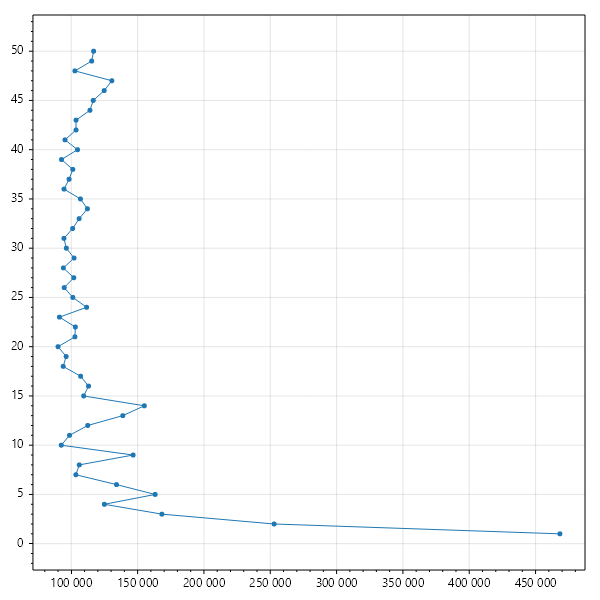

In [2]:
#r "nuget: xunit, 2.8.1"
#r "nuget:ScottPlot, 5.0.35"

using Xunit;
using Microsoft.DotNet.Interactive.Formatting;

Formatter.Register(typeof(ScottPlot.Plot), (p, w) => 
    w.Write(((ScottPlot.Plot)p).GetImageHtml(600, 600)), HtmlFormatter.MimeType);

var X = (double x) => x;
var SIN = (double x) => Math.Sin(x);
List<int> threadCounts = new List<int>();
List<long> executionTimes = new List<long>();


Assert.Equal(0, DefiniteIntegral.Solve(-100, 100, SIN, 1e-4, 8).res, 1e-4);

for (int i = 1; i <= 50; i += 1)
{
    var (res, t) = DefiniteIntegral.Solve(-100, 100, SIN, 1e-4, i);
    threadCounts.Add(i);
    executionTimes.Add(t);
    Console.WriteLine($"Кол-во потоков: {i}, Время выполения: {t} ");
}

double[] dataThreads = threadCounts.Select(x => (double)x).ToArray();
double[] dataTimes = executionTimes.Select(x => (double)x).ToArray();

ScottPlot.Plot plt = new();
plt.Add.Scatter(dataTimes, dataThreads);

plt